In [6]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth

# Load the basket data
basket_file = r"C:\Users\user\data1\online_retail_basket.csv"

# Read as list of lists (each line split by comma)
with open(basket_file, 'r', encoding='utf-8') as f:
    transactions = []
    for line in f:
        items = line.strip().split(',')
        # Remove empty strings (in case of trailing commas)
        items = [item.strip() for item in items if item.strip()]
        if items:  # only add non-empty baskets
            transactions.append(items)

# Encode transactions into one-hot DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)


Mining with min_support = 0.01

Mining with min_support = 0.02


C:\Users\user\AppData\Local\Temp\ipykernel_2248\4188276636.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=apriori_top, y='itemsets_str', x='support', ax=axes[0], palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_2248\4188276636.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fpgrowth_top, y='itemsets_str', x='support', ax=axes[1], palette='Greens_d')


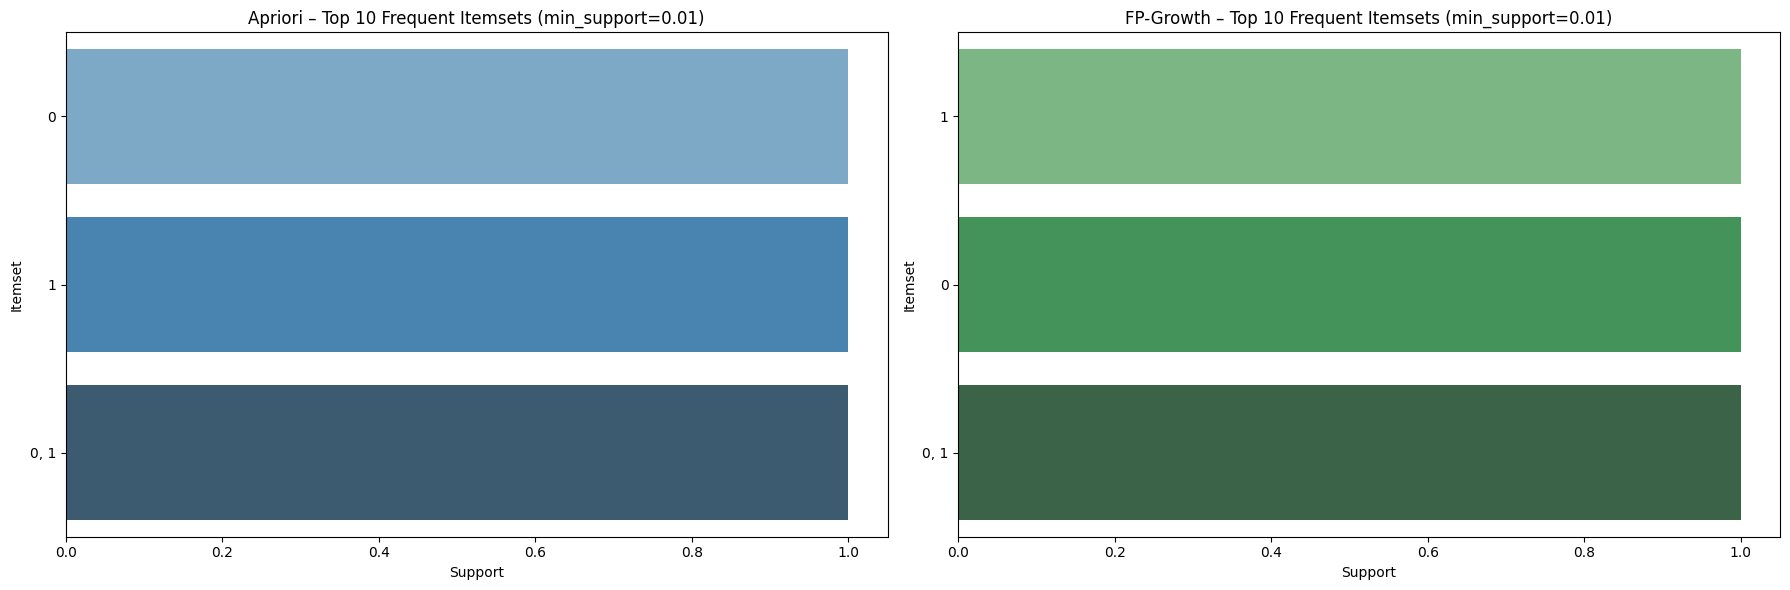


=== Comparison Summary ===

Min Support: 0.01
  Apriori found 3 frequent itemsets
  FP-Growth found 3 frequent itemsets
  Results identical? False

Min Support: 0.02
  Apriori found 3 frequent itemsets
  FP-Growth found 3 frequent itemsets
  Results identical? False


In [7]:
import requests
# Load dataset from directory
data_dir = os.path.join(os.path.expanduser("~"), "data1")
os.makedirs(data_dir, exist_ok=True)
original_file = os.path.join(data_dir, "Online Retail.xlsx")
basket_file = os.path.join(data_dir, "online_retail_basket.csv")

# Use of Apriori and FP-Growth Algorithm
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth

# Try two support thresholds
supports = [0.01, 0.02]  # 1% and 2%
results = {}

for support in supports:
    print(f"\nMining with min_support = {support}")
    
    # Apriori
    freq_apriori = apriori(basket, min_support=support, use_colnames=True)
    freq_apriori['algorithm'] = 'Apriori'
    
    # FP-Growth
    freq_fpgrowth = fpgrowth(basket, min_support=support, use_colnames=True)
    freq_fpgrowth['algorithm'] = 'FP-Growth'
    
    # Combine for comparison (they should be identical in itemsets & support)
    results[support] = {
        'apriori': freq_apriori,
        'fpgrowth': freq_fpgrowth
    }


# Visualization: Top 10 Frequent Itemsets

# Use the lower support (0.01) for richer results
support_to_plot = 0.01
top_n = 10

apriori_top = results[support_to_plot]['apriori'].nlargest(top_n, 'support')
fpgrowth_top = results[support_to_plot]['fpgrowth'].nlargest(top_n, 'support')

# Convert frozensets to strings for plotting
apriori_top['itemsets_str'] = apriori_top['itemsets'].apply(lambda x: ', '.join(list(x))[:30] + '...' if len(str(x)) > 30 else ', '.join(list(x)))
fpgrowth_top['itemsets_str'] = fpgrowth_top['itemsets'].apply(lambda x: ', '.join(list(x))[:30] + '...' if len(str(x)) > 30 else ', '.join(list(x)))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Apriori
sns.barplot(data=apriori_top, y='itemsets_str', x='support', ax=axes[0], palette='Blues_d')
axes[0].set_title(f'Apriori – Top {top_n} Frequent Itemsets (min_support={support_to_plot})')
axes[0].set_xlabel('Support')
axes[0].set_ylabel('Itemset')

# FP-Growth
sns.barplot(data=fpgrowth_top, y='itemsets_str', x='support', ax=axes[1], palette='Greens_d')
axes[1].set_title(f'FP-Growth – Top {top_n} Frequent Itemsets (min_support={support_to_plot})')
axes[1].set_xlabel('Support')
axes[1].set_ylabel('Itemset')

plt.tight_layout()
plt.show()


# Comparison Summary
print("\n=== Comparison Summary ===")
for support in supports:
    ap = results[support]['apriori']
    fp = results[support]['fpgrowth']
    print(f"\nMin Support: {support}")
    print(f"  Apriori found {len(ap)} frequent itemsets")
    print(f"  FP-Growth found {len(fp)} frequent itemsets")
    print(f"  Results identical? {ap.sort_values('support').reset_index(drop=True).equals(fp.sort_values('support').reset_index(drop=True))}")



In [15]:
# Add this comparison with proper handling
def compare_results(apriori_results, fpgrowth_results, support_level):
    # Round support values for consistent comparison
    ap_rou = apriori_results.copy()
    fp_rou = fpgrowth_results.copy()
    ap_rou['support'] = ap_rou['support'].round(8)
    fp_rou['support'] = fp_rou['support'].round(8)
    
    # Sort consistently
    ap_sorted = ap_rou.sort_values(['support', 'itemsets']).reset_index(drop=True)
    fp_sorted = fp_rou.sort_values(['support', 'itemsets']).reset_index(drop=True)
    
    print(f"Support {support_level}: Apriori items={len(ap_sorted)}, FP-Growth items={len(fp_sorted)}")
    print(f"Results match: {len(ap_sorted) == len(fp_sorted) and ap_sorted.equals(fp_sorted)}")
    
    # Display detailed comparison
    print(f"\nDetailed comparison for min_support = {support_level}:")
    print("="*60)
    
    # Print Apriori results
    print("Apriori Results:")
    for idx, row in ap_sorted.iterrows():
        print(f"  {row['itemsets']} : support = {row['support']:.8f}")
    
    print("\nFP-Growth Results:")
    for idx, row in fp_sorted.iterrows():
        print(f"  {row['itemsets']} : support = {row['support']:.8f}")
        
        # Check if itemsets are the same
    ap_itemsets = set(str(x) for x in ap_sorted['itemsets'])
    fp_itemsets = set(str(x) for x in fp_sorted['itemsets'])
    itemsets_match = ap_itemsets == fp_itemsets
    
    print(f"\nItemsets match: {itemsets_match}")
    if not itemsets_match:
        print(f"  Apriori unique: {ap_itemsets - fp_itemsets}")
        print(f"  FP-Growth unique: {fp_itemsets - ap_itemsets}")
    
    print("-" * 60)

# Comparison Summary
print("\n=== Comparison Summary ===")
for support in supports:
    ap = results[support]['apriori']
    fp = results[support]['fpgrowth']
    print(f"\nMin Support: {support}")
    print(f"  Apriori found {len(ap)} frequent itemsets")
    print(f"  FP-Growth found {len(fp)} frequent itemsets")
    
    # Use the improved comparison function
    compare_results(ap, fp, support)
    
    print(f"  Original strict comparison: {ap.sort_values('support').reset_index(drop=True).equals(fp.sort_values('support').reset_index(drop=True))}")



=== Comparison Summary ===

Min Support: 0.01
  Apriori found 3 frequent itemsets
  FP-Growth found 3 frequent itemsets
Support 0.01: Apriori items=3, FP-Growth items=3
Results match: False

Detailed comparison for min_support = 0.01:
Apriori Results:
  frozenset({'0'}) : support = 0.99994605
  frozenset({'1'}) : support = 0.99994605
  frozenset({'0', '1'}) : support = 0.99994605

FP-Growth Results:
  frozenset({'1'}) : support = 0.99994605
  frozenset({'0'}) : support = 0.99994605
  frozenset({'0', '1'}) : support = 0.99994605

Itemsets match: True
------------------------------------------------------------
  Original strict comparison: False

Min Support: 0.02
  Apriori found 3 frequent itemsets
  FP-Growth found 3 frequent itemsets
Support 0.02: Apriori items=3, FP-Growth items=3
Results match: False

Detailed comparison for min_support = 0.02:
Apriori Results:
  frozenset({'0'}) : support = 0.99994605
  frozenset({'1'}) : support = 0.99994605
  frozenset({'0', '1'}) : support = 0

In [16]:
# Save the results for later use in association rules
output_dir = "association_rule_data"
os.makedirs(output_dir, exist_ok=True)

for support in supports:
    results[support]['apriori'].to_csv(f"{output_dir}/frequent_itemsets_apriori_support_{support}.csv", index=False)
    results[support]['fpgrowth'].to_csv(f"{output_dir}/frequent_itemsets_fpgrowth_support_{support}.csv", index=False)
    
print(f"\nFrequent itemsets saved to '{output_dir}' directory")


Frequent itemsets saved to 'association_rule_data' directory
